In [91]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram

In [188]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src


  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/pip-req-build-0mt3gqku
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/pip-req-build-0mt3gqku
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit da214d493867df4b6d3411e7aa7b1bc02d2aa0e5
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=16948 sha256=cdf13cc468c7bc6ae7502ec3469899379697bcb896cc14828d4492e0345771ee
  Stored in directory: /private/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/pip-ephem-wheel-cache-p2te_bf_/wheels/75/76/cd/ff92751b9ab5f2d12c73e551ee92adf4615fb6b7d37b77f0e4
Successfully built qiskit-textbook
Note: you may need to restart the kernel to use updated packages.


In [92]:
from qiskit import IBMQ
IBMQ.save_account('9f8857f4b76aff1cf0d0a8f4476724e9218e4e2580c36e1997673d44aa8c14f2c0f458fe85cb1ebdcf47351ba88af4c4b0539d7db9d6d005c29153c3031c351a')
provider = IBMQ.load_account()
provider

configrc.store_credentials:WARNING:2022-03-22 21:33:40,442: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [88]:
qc_output=QuantumCircuit(8)
qc_output.x(3)
qc_output.h(4)
qc_output.measure_all()
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>──────░─┤M├─────────────────────
                ░ └╥┘┌─┐                  
  q_1: |0>──────░──╫─┤M├──────────────────
                ░  ║ └╥┘┌─┐               
  q_2: |0>──────░──╫──╫─┤M├───────────────
          ┌───┐ ░  ║  ║ └╥┘┌─┐            
  q_3: |0>┤ X ├─░──╫──╫──╫─┤M├────────────
          ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>┤ H ├─░──╫──╫──╫──╫─┤M├─────────
          └───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>──────░──╫──╫──╫──╫──╫─┤M├──────
                ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>──────░──╫──╫──╫──╫──╫──╫─┤M├───
                ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
                ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7

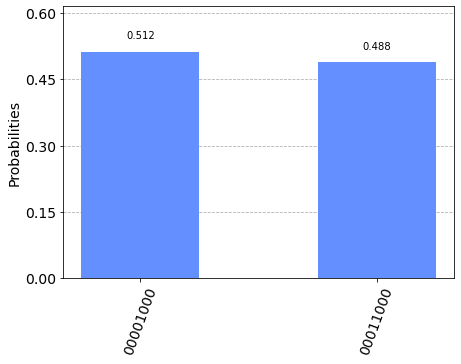

In [89]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

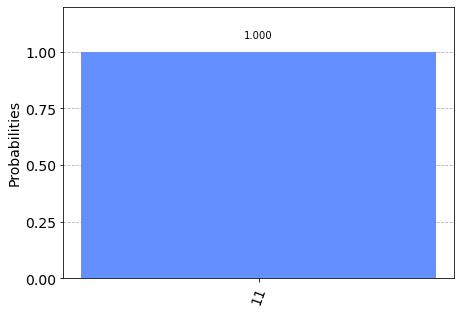

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [26]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

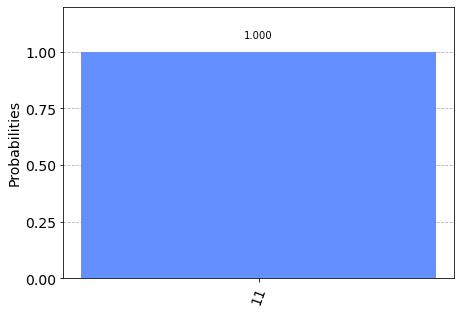

In [25]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

# HALF ADDER



In [130]:

from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,assemble,Aer
from qiskit.visualization import plot_histogram


cr= ClassicalRegister(2,'o')
qr= QuantumRegister(4,'i')

qc=QuantumCircuit(qr,cr)
qc.x(1)
#qc.x(0)
qc.barrier()
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()

qc.measure(2,1)
qc.measure(3,1)
qc.draw()


░                 ░       
i_0: ──────░───■─────────■───░───────
     ┌───┐ ░   │         │   ░       
i_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
i_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
i_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
o: 2/═══════════════════════════╩══╩═
                                1  1

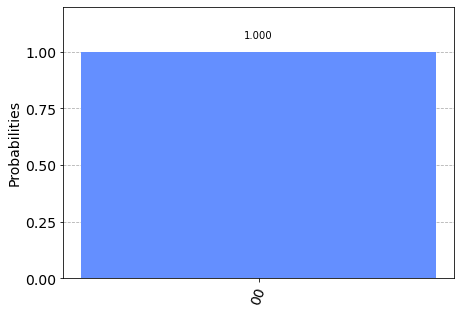

In [131]:

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

# FULL ADDER

In [ ]:



q = QuantumRegister(5,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)
#Input can cannot
circuit.x(q[0])
circuit.x(q[2])
circuit.cx(q[0],q[3])
circuit.cx(q[1],q[3])
circuit.cx(q[2],q[3])
circuit.ccx(q[0],q[1],q[4])
circuit.ccx(q[0],q[2],q[4])
circuit.ccx(q[1],q[2],q[4])

circuit.measure(q[3],c[0])
circuit.measure(q[4],c[1])
circuit.draw(initial_state=True)


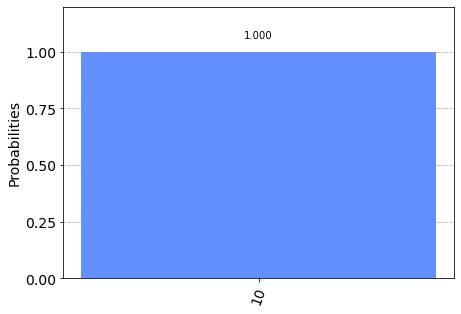

In [70]:

sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

# Create a Quantum Circuit acting
# on the q register

In [132]:



circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control
# qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the
# classical bits
circuit.measure([0,1], [0,1])

# circuit.measure_all()
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm
# simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'00': 481, '11': 519}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

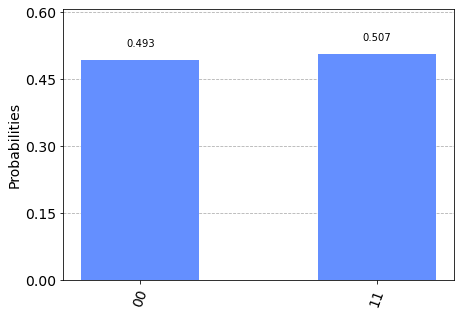

In [135]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

# SAVING STATE OF VECTORS ... INITIALIZING A QUIBIT WITH STATE 1


In [134]:

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
print(result.get_statevector())
qc.measure_all()
qc.draw()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

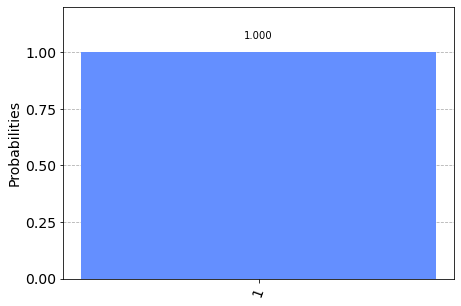

In [126]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

#  IMAGINARY NUMBERS



In [149]:
import numpy
#SAVING STATE OF VECTORS
#INITIALIZING A QUIBIT WITH STATE 0 AND 1
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>


qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


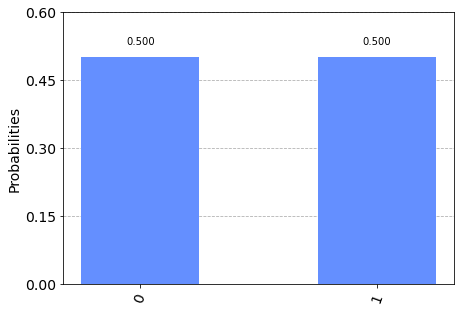

In [150]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [154]:
initial_state = [1j/sqrt(3), sqrt(2/3)]  # Define state |q_0>


qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)  

Statevector([0.        +0.57735027j, 0.81649658+0.j        ],
            dims=(2,))


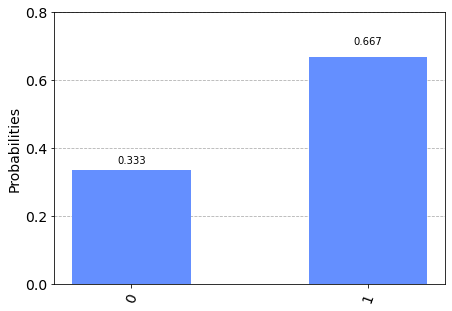

In [155]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

# PAULI GATE

In [161]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt

In [165]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

In [163]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

AttributeError: 'Arrow3D' object has no attribute '_path2d'

<Figure size 288x288 with 1 Axes>

In [185]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
#qc.measure_all()

qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)  
qc.draw()

Statevector([0.+0.000000e+00j, 1.-6.123234e-17j],
            dims=(2,))


┌──────────────────────────────┐┌───┐┌─┐ ░ 
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├─░─
     └──────────────────────────────┘└───┘└╥┘ ░ 
c: 1/══════════════════════════════════════╩════
                                           0

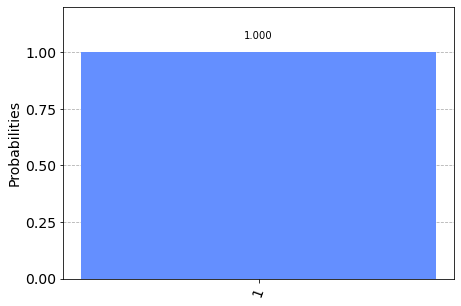

In [186]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [189]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

# R / P gate

In [191]:


qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

┌────────┐
q: ┤ P(π/4) ├
   └────────┘

# S gate

In [193]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ S ├┤ Sdg ├
   └───┘└─────┘

# T gate

In [194]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ T ├┤ Tdg ├
   └───┘└─────┘

# MULTI QUBIT 

In [195]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [203]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [204]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()


In [206]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Tensor or Kronecker Product of X and H 

In [207]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [211]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Duplicate key "unitary" in save instruction.


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

In [213]:

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

# Tensor or Kronecker Product of I and H 

In [232]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [233]:
# Simulate the unitary
usim = Aer.get_backend('qasm_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary1 = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

# Bell State


In [261]:
qc = QuantumCircuit(2)
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<IPython.core.display.Latex object>


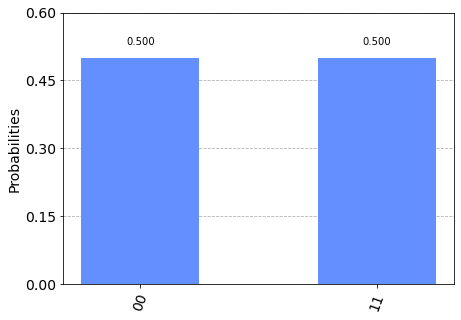

In [262]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
print(array_to_latex(final_state, prefix="\\text{Statevector = }"))
plot_histogram(result.get_counts())